# Worksheet 18

Name: Youxuan Ma

UID: U23330522

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

Where does randomness come from?

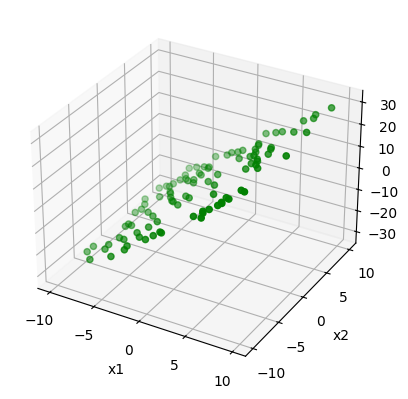

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

SAMPLE_SIZE = 100

# it's possible for y = 3 * x_1 + (1/4) * x_2
# but we don't know to look for x_2 and we only have x_1 as a feature
x1 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
x2 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = 3 * x1 + (1/4) * x2

# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111,projection='3d')

# and plot the point 
ax.scatter(x1 , x2 , y,  color='green')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

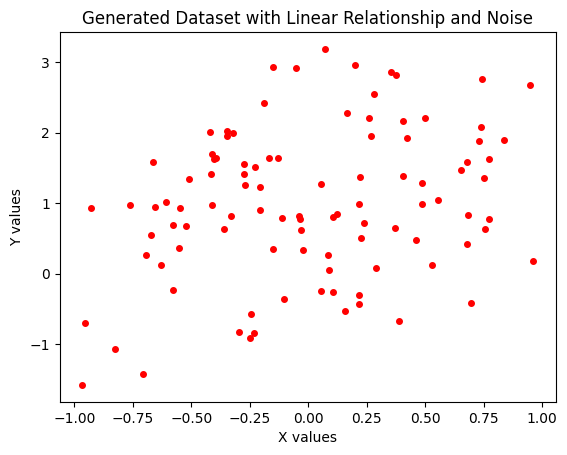

In [38]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([1, 0.5])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
# Adding a title to the plot for clarity
plt.title("Generated Dataset with Linear Relationship and Noise")
# Labeling the X and Y axes
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

b) Plot the least squares estimate line through the scatter plot.

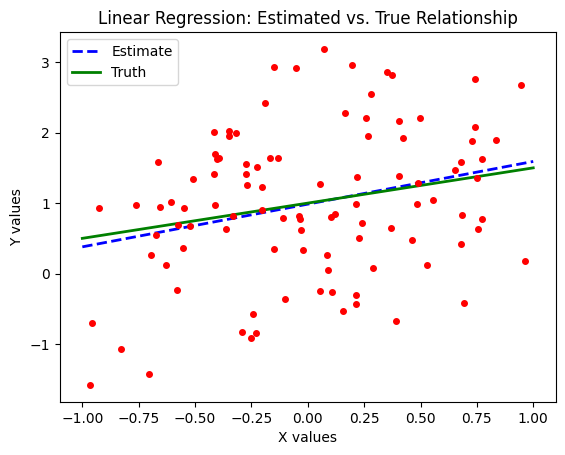

In [39]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
# Adding a title to the plot for clarity
plt.title("Linear Regression: Estimated vs. True Relationship")
# Labeling the X and Y axes
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

In [40]:
print("True beta: ", true_beta)
print("Estimated beta: ", beta_hat)

True beta:  [1.  0.5]
Estimated beta:  [0.9851906  0.60568061]


As we can see, the estimates of `beta` are very close to the true `beta` values we used to generate the data. 

The small deviations are normal and are often influenced by several factors like sample size, variance of the error term, and the distribution of the independent variables.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

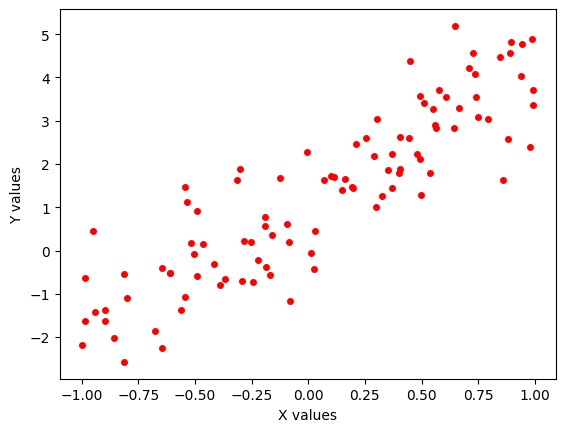

In [41]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([1.0, 3.0, 0.5])

x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE)

plt.plot(x,y,'ro',markersize=4)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()


e) Plot the least squares estimate line through the scatter plot.

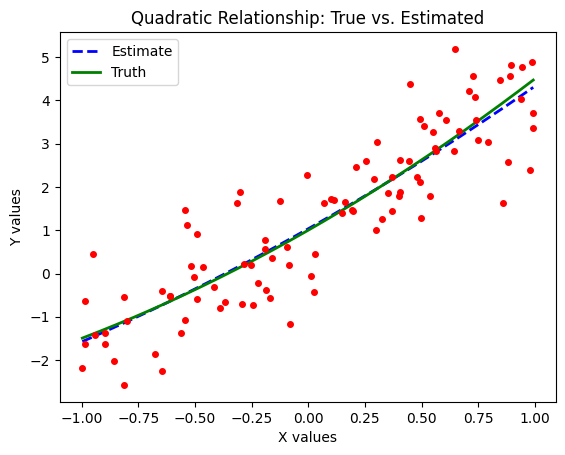

In [42]:
import numpy as np
import matplotlib.pyplot as plt

intercept = np.ones(np.shape(x)[0])
X = np.vstack([intercept, x, x**2]).T

beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(min(x), max(x), 500)
y_est = beta_hat[0] + beta_hat[1] * x_plot + beta_hat[2] * x_plot**2
plt.plot(x_plot, y_est, 'b--', label='Estimate', linewidth=2)
y_true = true_beta[0] + true_beta[1] * x_plot + true_beta[2] * x_plot**2
plt.plot(x_plot, y_true, color='green', linewidth=2, label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.title('Quadratic Relationship: True vs. Estimated')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

In [43]:
print("True beta: ", true_beta)
print("Estimated beta: ", beta_hat)

True beta:  [1.  3.  0.5]
Estimated beta:  [1.03356611 2.95445753 0.34003705]


As we can see, again, the estimated `beta` values are very close to the true `beta` values, and only the third `beta` value is off by a little.

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

Mean of estimated betas: [0.99916892 2.99745551 0.50177979]
Standard deviation of estimated betas: [0.15237896 0.17430939 0.3424852 ]


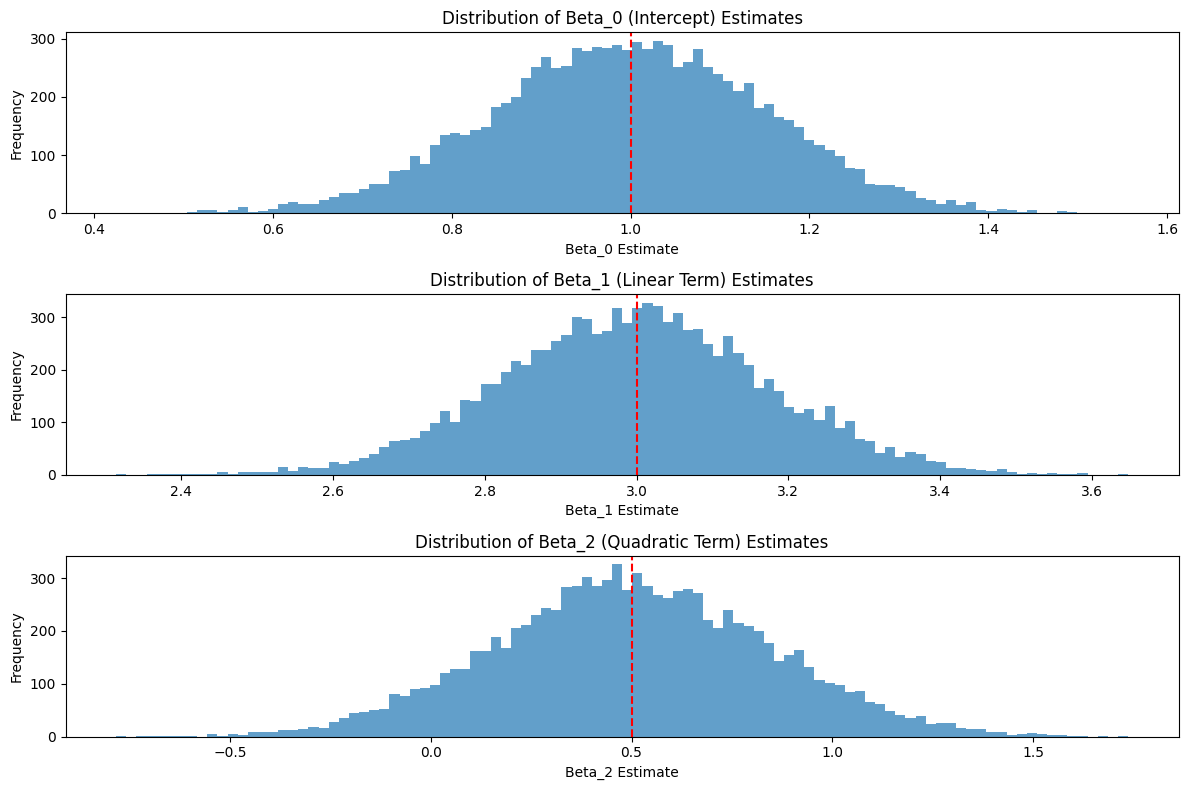

In [44]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100
betas = []
true_beta = np.array([1.0, 3.0, 0.5])
for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])
    X = np.vstack([intercept, x, x**2]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    betas.append(beta_hat)

beta_mean = np.mean(betas, axis=0)
beta_std = np.std(betas, axis=0)

print(f"Mean of estimated betas: {beta_mean}")
print(f"Standard deviation of estimated betas: {beta_std}")

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.hist(np.array(betas)[:, 0], bins=100, alpha=0.7)
plt.axvline(x=true_beta[0], c='r', linestyle='dashed')
plt.title('Distribution of Beta_0 (Intercept) Estimates')
plt.xlabel('Beta_0 Estimate')
plt.ylabel('Frequency')
plt.subplot(3, 1, 2)
plt.hist(np.array(betas)[:, 1], bins=100, alpha=0.7)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.title('Distribution of Beta_1 (Linear Term) Estimates')
plt.xlabel('Beta_1 Estimate')
plt.ylabel('Frequency')
plt.subplot(3, 1, 3)
plt.hist(np.array(betas)[:, 2], bins=100, alpha=0.7)
plt.axvline(x=true_beta[2], c='r', linestyle='dashed')
plt.title('Distribution of Beta_2 (Quadratic Term) Estimates')
plt.xlabel('Beta_2 Estimate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()